# Kristin Meier

# HW 3

## Exercise 1 – Web API

Write a python program to do the following:
1. Get a one month of historical weather data (i.e. temperatures). In specific: one month of data for 5 distinct locations.
2. You can use any WEB service available for free (i.e. Open-Weather-Map, Google, or any other service you may like) make sure to get an API-KEY if required.
3. Build a data summary table that summaries max, min, and mean values of the temperature during that month for each location selected.
4. Plot a graph that shows your data for the selected locations (to be used as comparative tool, you can choose any graphical presentation as you like).

**For non-historical data**

- [Weather Underground Example](https://github.com/InitialState/wunderground-sensehat/wiki/Part-1.-How-to-Use-the-Wunderground-API)
- [WeatherUnderground API search](https://www.google.com/search?q=weather+underground+API&ie=utf-8&oe=utf-8)

### Create list of dates
- datelist()
    - parameters: 
        - num_days = # of days to count back from firstdate
        - firstdate = most recent date in list 
    - returns:
        - list of dates in format for url
 
Help
- [List of dates](http://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python)
- [Date time format](http://stackoverflow.com/questions/6941965/convert-a-date-string-into-yyyymmdd)

In [1]:
import datetime

def datelist(num_days=31,firstdate = datetime.datetime(2016,12,31)):
    numdays = num_days
    base = firstdate # base = datetime.datetime.today()
    date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)] # create date list
    # put date in correct format for url
    dates = []
    for pos in range(len(date_list)):
        dates = dates + [date_list[pos].strftime('%Y%m%d')]

    return(dates)

## Function to get temperature

**MY KEY**: 74dda710a4bd7014 [my account](https://www.wunderground.com/weather/api/d/74dda710a4bd7014/edit.html?api_action=changesubscription&api_history=undefined&api_usage=0&api_package=a)

- gettemp()
    - Parameters:
        - tempdate: date for temperature, in format YYYYMMDD
        - stateabb: state abbreviation for temperature, ex. "NY"
        - city: city for temperature, underscore for space, ex. "New_York"
    - Returns:
        - temperature

Help
- no urllib2 for python 3, replace that line with "result = urllib.request.urlopen(url).read()" and the next line with "data = json.loads(result.decode())" The decode function changes the bytes to a string that json can then read.

Example url
http://api.wunderground.com/api/f5560c9956045526/history_19901221/q/CA/San_Francisco.json

In [35]:
import urllib, json
import urllib.request

def gettemp(tempdate,stateabb,city):
    base_url ='http://api.wunderground.com/api/74dda710a4bd7014/history_%s/q/%s/%s.json'
    url = base_url %(tempdate,stateabb,city)
    result = urllib.request.urlopen(url).read()
    data = json.loads(result.decode())
    return float(data['history']['observations'][0]['tempi'])

In [36]:
gettemp(tempdate=20131231,stateabb="NY",city="New_York")

21.9

### List of cities, states, and dates

In [37]:
states = ["CA","NY","IL","MA","DC"]
cities = ["San_Francisco","New_York","Chicago","Boston","Washington"]
dates = datelist()
dates.reverse() # reverse list to be in chronological order

## Get weather data

Loops through each location and each date, adding to a **weatherdata** dictionary with the city as the key

Having issues with hitting my search limit. If I use my "rainfall" allocation I can run the cities one at a time so I did that for the purpose of this assigment. Not sure why one at a time makes a difference from looping through cities. Perhaps I entered a new time allotment this way.

In [63]:
weatherdata = {}

for st in range(len(states)):
    temp = []
    for dt in dates:
        newtemp = gettemp(dt,states[st],cities[st])
        temp = temp + [newtemp]
    weatherdata[cities[st]] = temp

In [53]:
# went through by city not using big loop due to hitting allocated limit - this worked for some reason
#weatherdata = {}
'''cities = ["San_Francisco","New_York","Chicago","Boston","Washington"]

temp = []
for dt in dates:
    newtemp = gettemp(dt,"IL","Chicago")
    temp = temp + [newtemp]
weatherdata['Chicago'] = temp'''
#weatherdata_dc_bos_san_ny_chi # also saved dictionary under this var. in case I need to fix something

### Import Pandas, matlotlib and numpy

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Create pandas data frame from weatherdata dictionary

In [57]:
weatherdata['date'] = dates
weatherdf = pd.DataFrame(weatherdata)
weatherdf

,Boston,Chicago,New_York,San_Francisco,Washington,date
0,48.0,36.0,52.0,48.9,62.1,20161201
1,42.1,37.0,42.1,55.9,48.0,20161202
2,42.1,33.1,44.1,50.0,45.0,20161203
3,35.1,32.0,42.1,48.9,41.0,20161204
4,30.9,33.1,41.0,54.0,39.9,20161205
5,37.0,35.1,41.0,50.0,45.0,20161206
6,41.0,26.1,41.0,46.0,45.0,20161207
7,39.0,24.1,42.1,48.9,37.9,20161208
8,34.0,21.0,35.6,57.0,33.1,20161209
9,25.0,19.0,30.0,61.0,32.0,20161210


### Create summary
Data summary table that summaries max, min, and mean values. 
[Modify describe output](http://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe)

In [58]:
summary = round(weatherdf.describe().loc[['max','min','mean']])
summary

,Boston,Chicago,New_York,San_Francisco,Washington
max,48.0,40.0,52.0,61.0,62.0
min,11.0,-8.0,19.0,40.0,18.0
mean,34.0,25.0,37.0,49.0,40.0


### Plot data

Plot a line graph for temperature over time in each location.

Convert dates to date format for x-axis. 
- [Get dates as x-axis](http://stackoverflow.com/questions/14513339/date-is-not-displayed-correctly-when-plot-pandas-dataframe)
- [Sorting date issues](http://stackoverflow.com/questions/21782642/sorting-python-pandas-dataframe-with-respect-to-a-column-of-type-object)
- [Controlling Legend](http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)

In [59]:
# convert dates
# sorted by descending date in the order the table was made (list of dates)
# set index to date for plot! - now it will show on x axis
weatherdf.date = pd.to_datetime(weatherdf['date'],format='%Y%m%d')
weatherdf.set_index('date', inplace=True) # replace key to date so that is xaxis for plot

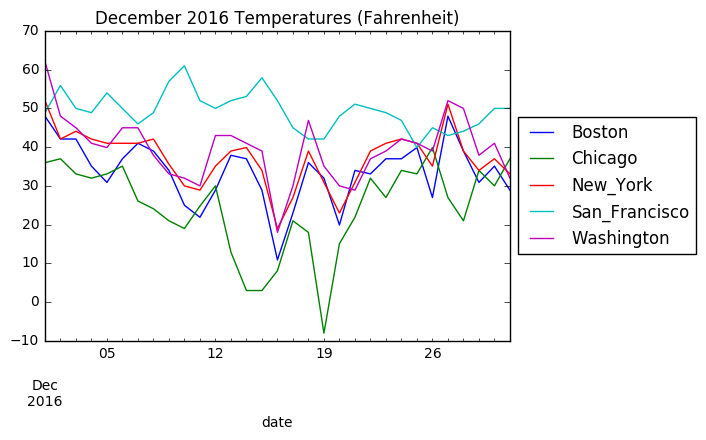

In [62]:
# super easy to plot multiple columns!!!

testplot = weatherdf.plot(title='December 2016 Temperatures (Fahrenheit)',legend=False)
box = testplot.get_position()
testplot.legend(loc='center left', ncol = 1, bbox_to_anchor=(1, 0.5)) # legend to the right plot w/ bbox_to_anchor

plt.show()